通过将腐蚀与膨胀进行先后组合，也就是开，闭运算。

* 开运算：先腐蚀后膨胀，消除高亮细节，消除暗处的较亮区域。对较大物体可不改变面积情况下平滑边界。

* 闭运算：先膨胀后腐蚀，填充亮处的黑色区域。同一个结构元，多次迭代处理可在不改变面积情况下平滑边界。


cv2.morphologyEx(src,op,element[, dst[, anchor[, iterations[, borderType[,borderValue]]]]])
op:
* MORPH_OPEN:开运算
* MORPH_CLOSE:闭运算
* MORPH_TOPHAT:顶帽运算
* MORPH_BLACKHAT：底帽运算
* MORPH_GRADIENT:梯度运算

增加调节结构元半径进度条与迭代次数进度条

开运算

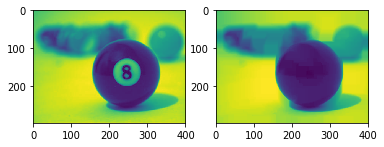

In [9]:
#-*- coding:utf-8 -*-
import sys
import cv2
import matplotlib.pyplot as plt
I_open = cv2.imread("open.jpg",0)
cv2.imshow("I_open",I_open)
#结构元半径与迭代次数调节条
r,i=1,1
MAX_R,MAX_I = 20,20
cv2.namedWindow("morphology",1)
def nothing(*arg):
    pass
cv2.createTrackbar("r","morphology",r,MAX_R,nothing)
cv2.createTrackbar("i","morphology",i,MAX_I,nothing)
while True:
    r = cv2.getTrackbarPos("r","morphology")
    i = cv2.getTrackbarPos("i","morphology")
    s = cv2.getStructuringElement(cv2.MORPH_RECT,(2*r+1,2*r+1))
    #形态学处理
    d_open = cv2.morphologyEx(I_open,cv2.MORPH_OPEN,s,iterations=i)
    cv2.imshow("morphology",d_open)
    ch = cv2.waitKey(5)
    if ch ==27:
        break
cv2.destroyAllWindows()

#r=3,iterations=5不错
plt.subplot(1,2,1)
plt.imshow(I_open)
plt.subplot(1,2,2)
s = cv2.getStructuringElement(cv2.MORPH_RECT,(2*3+1,2*3+1))
d_open = cv2.morphologyEx(I_open,cv2.MORPH_OPEN,s,iterations=5)
plt.imshow(d_open)
plt.show()

开运算，暗处中间高亮被消除

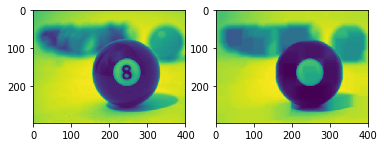

In [7]:
#-*- coding:utf-8 -*-
import sys
import cv2
import matplotlib.pyplot as plt
I_close = cv2.imread("open.jpg",0)
cv2.imshow("I_close",I_close)
#结构元半径与迭代次数调节条
r,i=1,1
MAX_R,MAX_I = 20,20
cv2.namedWindow("morphology",1)
def nothing(*arg):
    pass
cv2.createTrackbar("r","morphology",r,MAX_R,nothing)
cv2.createTrackbar("i","morphology",i,MAX_I,nothing)
while True:
    r = cv2.getTrackbarPos("r","morphology")
    i = cv2.getTrackbarPos("i","morphology")
    s = cv2.getStructuringElement(cv2.MORPH_RECT,(2*r+1,2*r+1))
    #形态学处理
    d_close = cv2.morphologyEx(I_close,cv2.MORPH_CLOSE,s,iterations=i)
    cv2.imshow("morphology",d_close)
    ch = cv2.waitKey(5)
    if ch ==27:
        break
cv2.destroyAllWindows()

#r=5,i=3不错，打印一下
plt.subplot(1,2,1)
plt.imshow(I_close)
plt.subplot(1,2,2)
s = cv2.getStructuringElement(cv2.MORPH_RECT,(2*5+1,2*5+1))
d_close = cv2.morphologyEx(I_close,cv2.MORPH_CLOSE,s,iterations=3)
plt.imshow(d_close)
plt.show()

闭运算，高亮中间暗处被消除